In [96]:
# Required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [97]:
# Loaded data
data = pd.read_excel("Date_Fruit_Datasets.xlsx")

# Preprocessing

In [98]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [99]:
data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [101]:
print(data.shape)
print(data["Class"].unique())

(898, 35)
['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


In [102]:
# Features dataset
x = data.drop('Class',axis=1)
# Labels dataset
y = data.loc[:,'Class']

In [103]:
# Normalization
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.155640,0.783942,0.604507,1.311643,-1.129568,1.075704,0.708628,1.108752,0.871873,-0.046797,...,0.555487,-0.349683,-0.575281,0.218565,-1.342811,-1.267269,-0.822728,0.538340,0.435593,-0.023908
1,0.371700,0.067067,-0.187473,0.869789,-1.899771,0.431437,0.857410,0.323373,0.804852,-0.051373,...,0.257494,-0.562154,-0.661407,-0.298009,-0.117030,-0.493225,-0.253422,-0.003550,0.284113,-0.024694
2,2.132265,1.439131,1.319121,1.921899,-0.993119,1.794103,0.791285,2.069149,0.547942,-0.045820,...,1.055673,-0.171667,-0.333868,0.457986,-3.049848,-2.670541,-2.197277,0.958897,0.742335,0.355243
3,1.098729,0.716350,0.535970,1.308399,-1.250230,1.031228,0.714138,1.051992,0.737832,-0.047612,...,2.453948,0.274066,0.935707,2.187189,-0.011006,-0.177706,-0.125142,-0.416894,-0.331475,-0.639369
4,0.459641,0.250603,0.091511,0.761463,-1.025822,0.507425,0.493720,0.431717,0.384115,-0.046056,...,1.005402,-0.534895,-0.570286,0.309306,-0.399329,-0.406627,0.143293,0.167646,0.148910,-0.502579


In [104]:
y.head()

0    BERHI
1    BERHI
2    BERHI
3    BERHI
4    BERHI
Name: Class, dtype: object

In [105]:
# LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print(type(y_encoded))
y = pd.DataFrame(y_encoded)
y.head()
y.iloc[:,0].unique()

<class 'numpy.ndarray'>


array([0, 1, 2, 3, 4, 5, 6])

In [106]:
# Train, test and validation split
# Train -> %80 || Validation -> %10 || Test -> %10
X_train , X_temp , Y_train , Y_temp = train_test_split(x,y,test_size=0.2,random_state=33)
X_val , X_test , Y_val , Y_test = train_test_split(X_temp,Y_temp,test_size=0.5, random_state=33)
print("Total data" , len(x))
print("X_train: " , X_train.shape)
print("X_val: " , X_val.shape)
print("X_test: " , X_test.shape)

Total data 898
X_train:  (718, 34)
X_val:  (90, 34)
X_test:  (90, 34)


# Constructing the Neural Network

In [107]:
import tensorflow as tf

In [108]:
model = tf.keras.Sequential()

In [109]:
# Input Layer
input_layer = tf.keras.layers.Dense(4096, input_shape=(34,), activation='relu')
model.add(input_layer)

In [110]:
# Hidden Layers -> 4
# Dropout -> 0.5
# first hidden layer
model.add(tf.keras.layers.Dense(4096,activation='relu'))
model.add(tf.keras.layers.Dropout(0.50))
# second hidden layer
model.add(tf.keras.layers.Dense(4096,activation='relu'))
model.add(tf.keras.layers.Dropout(0.50))
# third hidden layer
model.add(tf.keras.layers.Dense(4096,activation='relu'))
model.add(tf.keras.layers.Dropout(0.50))
# fourth hidden layer
model.add(tf.keras.layers.Dense(4096,activation='relu'))
model.add(tf.keras.layers.Dropout(0.50))
# # fifth hidden layer
# model.add(tf.keras.layers.Dense(4096,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.55))
# # Sixth hidden layer
# model.add(tf.keras.layers.Dense(4096,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.55))

In [111]:
# Output Layer
model.add(tf.keras.layers.Dense(7,activation='softmax'))
# Softmax is most used activation function for multiclass classification problems

In [112]:
# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model

In [113]:
from sklearn.utils import validation
results = model.fit(X_train , Y_train , epochs=150 , validation_data=(X_val , Y_val))

Epoch 1/150
23/23 [==============================] - 1s 26ms/step - loss: 1.1575 - accuracy: 0.6309 - val_loss: 0.7760 - val_accuracy: 0.8111
Epoch 2/150
23/23 [==============================] - 0s 17ms/step - loss: 0.6320 - accuracy: 0.7883 - val_loss: 0.5613 - val_accuracy: 0.8667
Epoch 3/150
23/23 [==============================] - 0s 18ms/step - loss: 0.4209 - accuracy: 0.8593 - val_loss: 0.2203 - val_accuracy: 0.9222
Epoch 4/150
23/23 [==============================] - 0s 17ms/step - loss: 0.4277 - accuracy: 0.8733 - val_loss: 0.3951 - val_accuracy: 0.9333
Epoch 5/150
23/23 [==============================] - 0s 18ms/step - loss: 0.4069 - accuracy: 0.8788 - val_loss: 0.3765 - val_accuracy: 0.9000
Epoch 6/150
23/23 [==============================] - 0s 17ms/step - loss: 0.3026 - accuracy: 0.9164 - val_loss: 0.4261 - val_accuracy: 0.9000
Epoch 7/150
23/23 [==============================] - 0s 18ms/step - loss: 0.4625 - accuracy: 0.8788 - val_loss: 0.5639 - val_accuracy: 0.8556
Epoch 

# Visualize the result

In [114]:
pd.DataFrame(results.history).tail()

,loss,accuracy,val_loss,val_accuracy
145,0.533875,0.951253,0.630735,0.911111
146,0.564398,0.966574,1.669361,0.900000
147,0.637171,0.926184,2.096369,0.822222
148,0.658722,0.917827,1.196521,0.900000
149,1.004053,0.902507,0.659508,0.877778


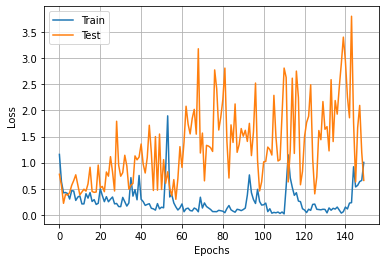

In [115]:
# Visualization
plt.plot(results.history["loss"], label="Train")
plt.plot(results.history["val_loss"], label="Test")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.grid(True)
plt.legend()

plt.show()

# Performanca Evaluation

In [116]:
test_result = model.test_on_batch(X_test,Y_test)
print(test_result)
# First element loss, second alamant accuracy

[0.4789694845676422, 0.8999999761581421]
